In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Forcing Forecast

In [2]:
path = '../data/forcing_forcast.txt'
with open(path, 'r') as f:
    file = f.readlines()

data = []
for line in file:
    data.append(line.split())

df_F = pd.DataFrame(data[1:])
df_F.columns = data[0]
df_F.set_index('Year', inplace=True)
df_F = df_F.astype(float)
df_F = df_F[['All']]
df_F

# save to data/final/forcing_forecast.csv
df_F.to_csv('../data/final/forcing_forecast.csv')

# Forcing historical (Schmidt)

In [3]:
df = pd.read_csv('../data/schmidt_11_paleoforcings_cleaned.csv', index_col=0)
df = df[['Total forcing [V,S,L,G]']]

# save to data/final/forcing.csv
df.to_csv('../data/final/forcing.csv')

In [4]:
df_Fi = pd.concat([df, df_F], axis=0)

# take "Total forcing [V,S,L,G]" if "All" not available
df_Fi['total'] = df_Fi.apply(lambda x: x['Total forcing [V,S,L,G]'] if np.isnan(x['Total forcing [V,S,L,G]']) == False else x['All'], axis=1)
df_Fi = df_Fi[['total']]

# make index a int
df_Fi.index = df_Fi.index.astype(int)
# sort index, and check there are no missing years or duplicates

df_Fi = df_Fi.sort_index()
df_Fi.index.is_unique


# save to data/final/forcing_all.csv
df_Fi.to_csv('../data/final/forcing_all.csv')

<Axes: xlabel='Year'>

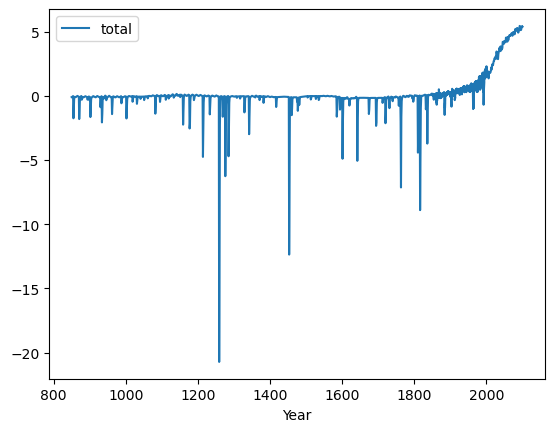

In [5]:
df_Fi.plot()

# Temperature

In [6]:
path = '../data/processed_temperature_data.csv'
df_T = pd.read_csv(path, index_col=0)
df_T = df_T[['Annual', 'Annual_uncertainty']]

# save to data/final/temperature.csv
df_T.to_csv('../data/final/temperature.csv')